# Flights Data Exploration Challenge

Note: Ran this on 3.10.17 (even though the docs suggested something much older. )

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.


In [16]:
%pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.1-cp310-cp310-macosx_10_9_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3-p

In [33]:
%pip install pandas

import pandas as pd

df_flights = pd.read_csv("data/flights.csv")
df_flights.head()

Note: you may need to restart the kernel to use updated packages.


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
   - Identify any null or missing data, and impute appropriate replacement values.
   - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
   - View summary statistics for the numeric fields in the dataset.
   - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
   - Use statistics, aggregate functions, and visualizations to answer the following questions:
     - _What are the average (mean) departure and arrival delays?_
     - _How do the carriers compare in terms of arrival delay performance?_
     - _Is there a noticable difference in arrival delays for different days of the week?_
     - _Which departure airport has the highest average departure delay?_
     - _Do **late** departures tend to result in longer arrival delays than on-time departures?_
     - _Which route (from origin airport to destination airport) has the most **late** arrivals?_
     - _Which route has the highest average arrival delay?_

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).


In [34]:
print("Shape:", df_flights.shape)
print("Summary of Nulls")
df_flights.isna().sum()

Shape: (271940, 20)
Summary of Nulls


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
# This was the first approach. After I saw their answer I wanted to try what they did.
# df_flights = df_flights.dropna(axis=0, how='any') # these are the default parameters
# print("Shape:",df_flights.shape)
df_flights[df_flights.isna().any(axis=1)][
    ["DepDelay", "DepDel15"]
]  # without the .any(axis=1) it was showing NaN in the DeDelay column as well, not sure why
# Notices that there are no delays in the cases where DeDel15 is NaN

# Keep in mind you are't seeing all the values so we need to do some more checks.

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [ ]:
df_flights[df_flights.isna().any(axis=1)][["DepDelay", "DepDel15"]].describe()
# Min and Max are zero, so we can assume that these are not delays.

,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


In [38]:
# fill the NaNs with zeroes
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
print("Shape:", df_flights.shape)
df_flights.isna().sum()

Shape: (271940, 20)


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Look for Outliers


In [51]:
def show_me_the_data(col):
    min_value = col.min()
    max_value = col.max()
    mean_value = col.mean()
    median_value = col.median()
    mode_value = col.mode()[0]  # mode returns a Series, we take the first value
    std_value = col.std()
    print(
        f"Min: {min_value} Max: {max_value} Mean: {mean_value} Median: {median_value}  Mode: {mode_value} Std: {std_value}"
    )


col_names = ["DepDelay", "ArrDelay"]
for col_name in col_names:
    print(f"Summary of {col_name}")
    show_me_the_data(df_flights[col_name])
    print("\n")


Summary of DepDelay
Min: -63 Max: 1425 Mean: 10.350448628373906 Median: -1.0  Mode: -3 Std: 35.673709956671146


Summary of ArrDelay
Min: -75 Max: 1440 Mean: 6.496649996322718 Median: -3.0  Mode: 0 Std: 38.23033101550244




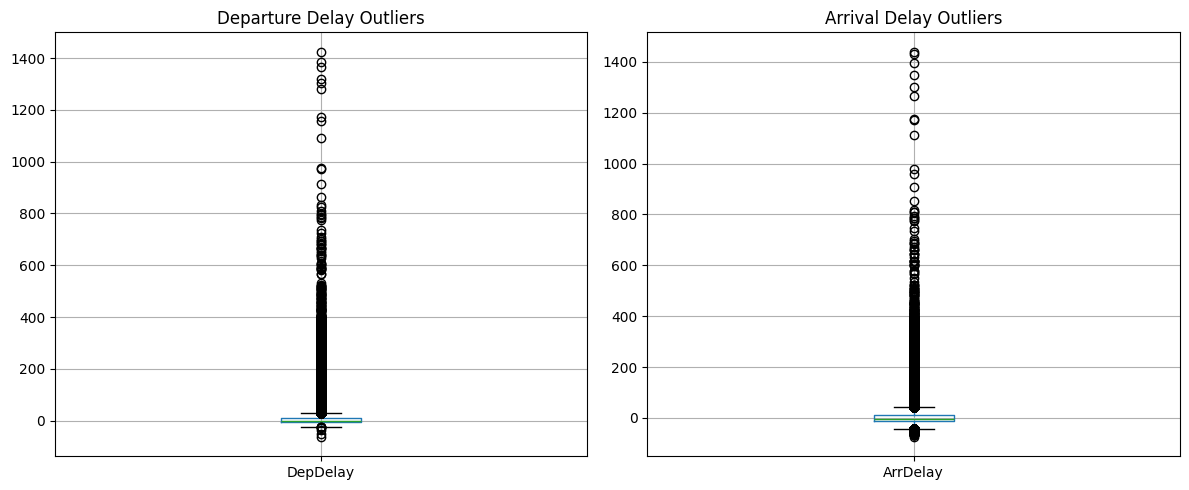

In [52]:
import matplotlib.pyplot as plt

# Plot boxplots to visualize outliers in DepDelay and ArrDelay
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_flights.boxplot(column="DepDelay")
plt.title("Departure Delay Outliers")

plt.subplot(1, 2, 2)
df_flights.boxplot(column="ArrDelay")
plt.title("Arrival Delay Outliers")

plt.tight_layout()
plt.show()

In [53]:
# Check for invalid values in relevant columns

# 1. CRSDepTime and CRSArrTime should be between 0 and 2359

invalid_crs_dep = df_flights[(df_flights['CRSDepTime'] < 0) | (df_flights['CRSDepTime'] > 2359)]
invalid_crs_arr = df_flights[(df_flights['CRSArrTime'] < 0) | (df_flights['CRSArrTime'] > 2359)]

# 2. Month should be 1-12

invalid_month = df_flights[(df_flights['Month'] < 1) | (df_flights['Month'] > 12)]

# 3. DayofMonth should be 1-31

invalid_day = df_flights[(df_flights['DayofMonth'] < 1) | (df_flights['DayofMonth'] > 31)]

# 4. DayOfWeek should be 1-7

invalid_dow = df_flights[(df_flights['DayOfWeek'] < 1) | (df_flights['DayOfWeek'] > 7)]

# 5. Year should be 2013

invalid_year = df_flights[df_flights['Year'] != 2013]

# Display counts of invalid rows for each check

print("Invalid CRSDepTime:", len(invalid_crs_dep))
print("Invalid CRSArrTime:", len(invalid_crs_arr))
print("Invalid Month:", len(invalid_month))
print("Invalid DayofMonth:", len(invalid_day))
print("Invalid DayOfWeek:", len(invalid_dow))
print("Invalid Year:", len(invalid_year))


Invalid CRSDepTime: 0
Invalid CRSArrTime: 0
Invalid Month: 0
Invalid DayofMonth: 0
Invalid DayOfWeek: 0
Invalid Year: 0


In [54]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

There is more to learn/do here, but moving on.
